# Absenteeism

In [1836]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Preprocessing

In [1838]:
raw_data  = pd.read_csv('Absenteeism_data.csv')
raw_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [1839]:
data = raw_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [1840]:
data.describe(include='all')

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
unique,NaN,NaN,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,17/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.951429,19.411429,NaN,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,NaN,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,NaN,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,NaN,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,NaN,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000


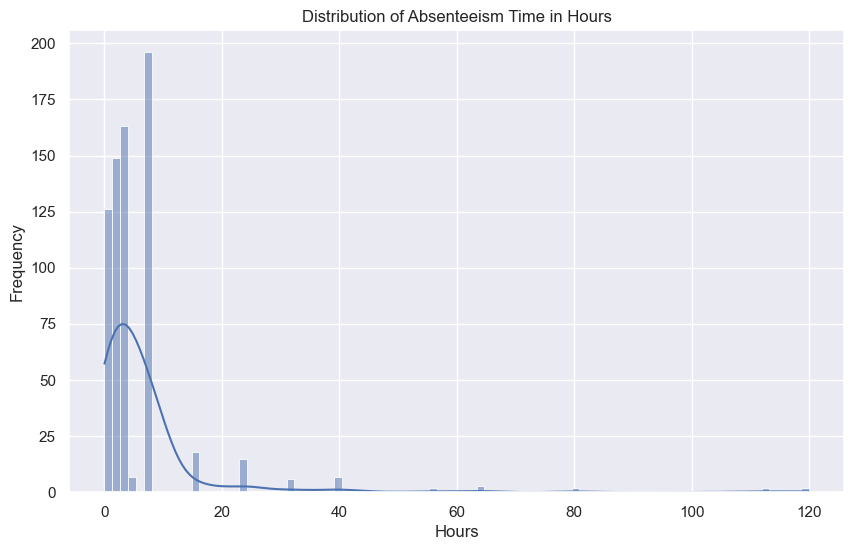

In [1841]:
# Visualize the distribution of absenteeism hours
plt.figure(figsize=(10, 6))
sns.histplot(data['Absenteeism Time in Hours'], kde=True)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.savefig('pictures/absenteeism_distribution.png')
plt.show()

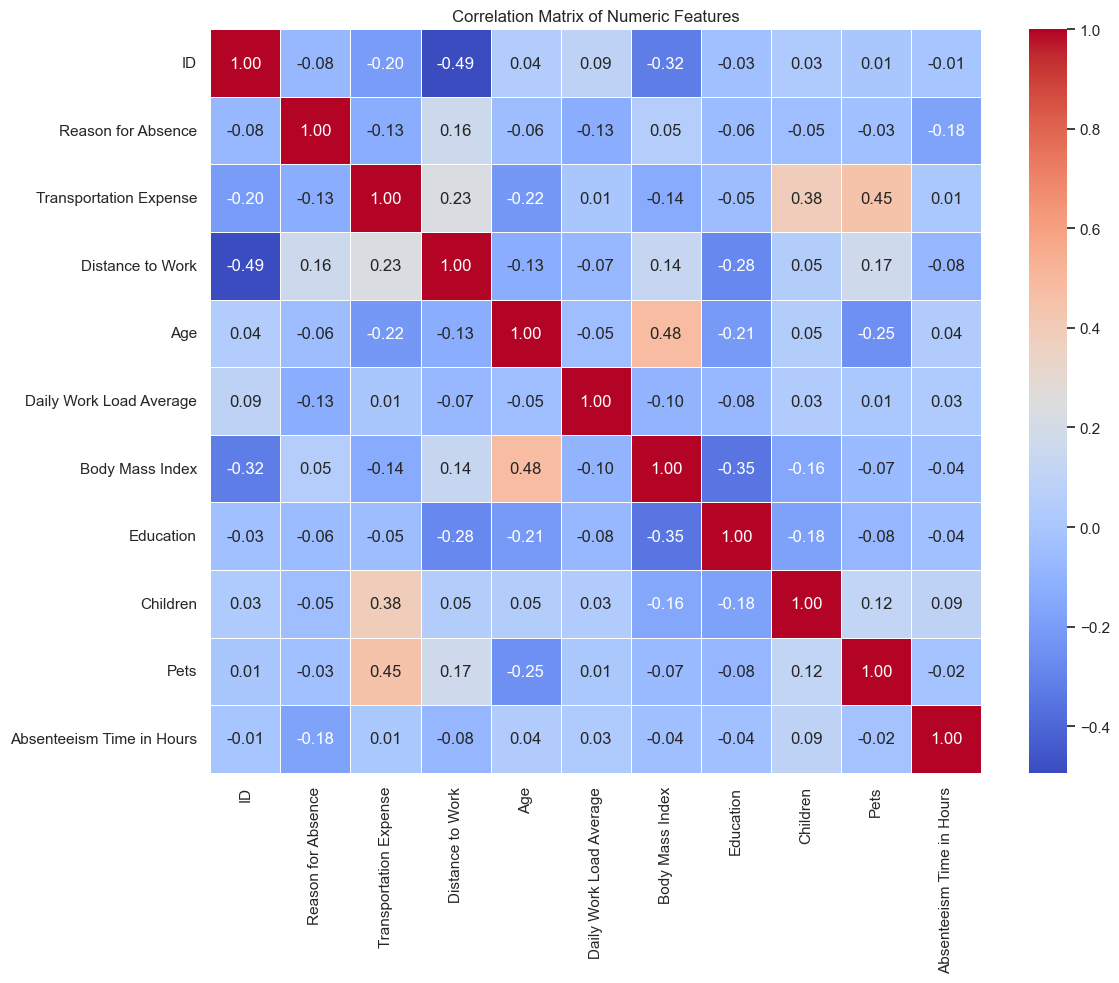

In [1842]:
# Correlation analysis
plt.figure(figsize=(12, 10))
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('pictures/correlation_matrix.png')
plt.show()

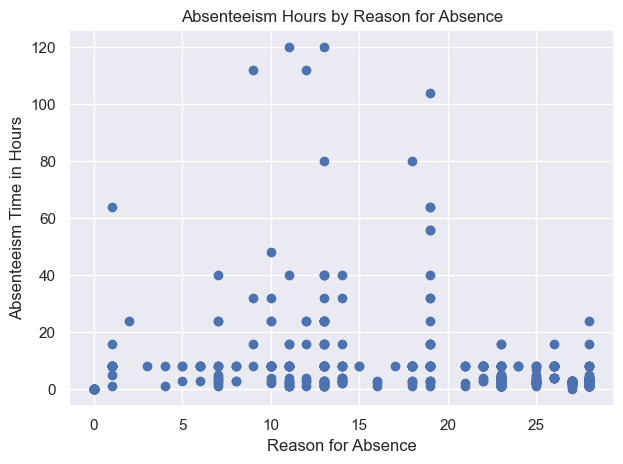

In [1843]:
plt.scatter(data['Reason for Absence'], data['Absenteeism Time in Hours'])
plt.xlabel('Reason for Absence')
plt.ylabel('Absenteeism Time in Hours')
plt.title('Absenteeism Hours by Reason for Absence')
plt.tight_layout()
plt.savefig('pictures/Absenteeism Hours by Reason for Absence.png')
plt.show()

In [1844]:
data = data.drop(['ID'], axis=1)
data

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [1845]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [1846]:
data

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,6,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,10,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,23,2018-05-24,235,16,32,237.656,25,3,0,0,2


### Date

In [1848]:
data['Date'][0].month

7

In [1849]:
def extract_month(x):
    return x.month

In [1850]:
data['Month Value'] = data['Date'].apply(extract_month)
data

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,40,237.656,22,2,2,0,8,5
696,6,2018-05-23,225,26,28,237.656,24,1,1,2,3,5
697,10,2018-05-24,330,16,28,237.656,25,2,0,0,8,5
698,23,2018-05-24,235,16,32,237.656,25,3,0,0,2,5


In [1851]:
data['Date'][0].day_of_week

1

In [1852]:
def extract_day_of_week(x):
    return x.day_of_week

In [1853]:
data['Day of the Week'] = data['Date'].apply(extract_day_of_week)
data

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,6,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,10,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,23,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


### Reason for Absence

In [1855]:
data['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [1856]:
np.sort(data['Reason for Absence'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [1857]:
reason_for_absence = pd.get_dummies(data=data['Reason for Absence'], dtype=int, drop_first=True)
reason_for_absence

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Group the Reasons for Absence

In [1859]:
reason_1 = reason_for_absence.loc[:, 1:14]
reason_2 = reason_for_absence.loc[:, 15:17]
reason_3 = reason_for_absence.loc[:, 18:21]
reason_4 = reason_for_absence.loc[:, 22:]

In [1860]:
reason_1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1861]:
reason_1 = reason_1.max(axis=1)
reason_1

0      0
1      0
2      0
3      1
4      0
      ..
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: int32

In [1862]:
reason_2 = reason_2.max(axis=1)
reason_3 = reason_3.max(axis=1)
reason_4 = reason_4.max(axis=1)

### Concatenate columns value

In [1864]:
concat_data = pd.concat([data, reason_1, reason_2, reason_3, reason_4], axis=1)
concat_data

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week,0,1,2,3
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1,0,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2,1,0,0,0
696,6,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2,1,0,0,0
697,10,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3,1,0,0,0
698,23,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3,0,0,0,1


In [1865]:
concat_data = concat_data.drop(['Reason for Absence', 'Date'], axis=1)
concat_data.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week,0,1,2,3
0,289,36,33,239.554,30,1,2,1,4,7,1,0,0,0,1
1,118,13,50,239.554,31,1,1,0,0,7,1,0,0,0,0
2,179,51,38,239.554,31,1,0,0,2,7,2,0,0,0,1
3,279,5,39,239.554,24,1,2,0,4,7,3,1,0,0,0
4,289,36,33,239.554,30,1,2,1,2,7,3,0,0,0,1


In [1866]:
concat_data.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week', 0, 1, 2, 3], dtype=object)

In [1867]:
column_names = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week', 'Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4']

In [1868]:
concat_data.columns = column_names
concat_data.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4
0,289,36,33,239.554,30,1,2,1,4,7,1,0,0,0,1
1,118,13,50,239.554,31,1,1,0,0,7,1,0,0,0,0
2,179,51,38,239.554,31,1,0,0,2,7,2,0,0,0,1
3,279,5,39,239.554,24,1,2,0,4,7,3,1,0,0,0
4,289,36,33,239.554,30,1,2,1,2,7,3,0,0,0,1


### Reorder columns

In [1870]:
column_names_reordered = ['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [1871]:
concat_data = concat_data[column_names_reordered]
concat_data.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


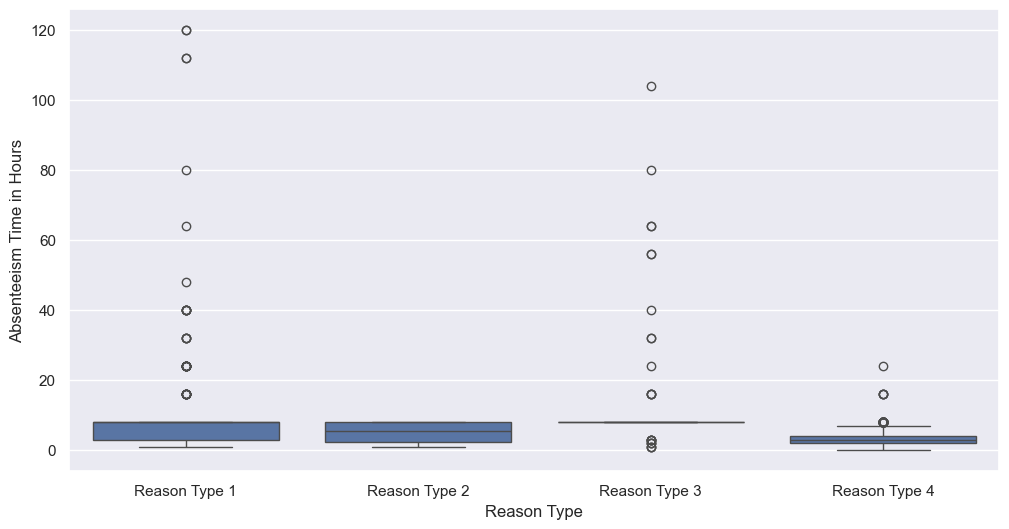

In [1872]:
reason_columns = ['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4']

# Create a new DataFrame with only the reason type and absenteeism hours
# for cases where the reason type is 1
plot_data = []
for reason in reason_columns:
    # Filter to only include rows where this reason type is 1
    filtered_data = concat_data[concat_data[reason] == 1]
    
    # Create a record for each filtered row
    for _, row in filtered_data.iterrows():
        plot_data.append({
            'Reason Type': reason,
            'Absenteeism Time in Hours': row['Absenteeism Time in Hours']
        })

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x='Reason Type', y='Absenteeism Time in Hours')
plt.savefig('pictures/Absenteeism Hours by Reason Type_boxplot.png')

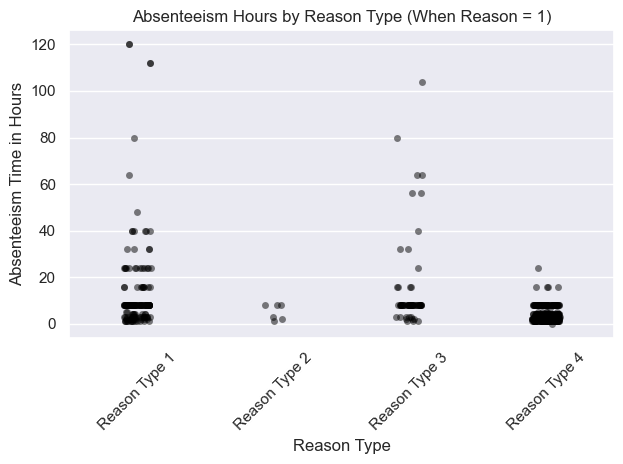

In [1873]:
# Add scatter points for individual data points
sns.stripplot(data=plot_df, x='Reason Type', y='Absenteeism Time in Hours', 
              color='black', alpha=0.5, jitter=True)

plt.title('Absenteeism Hours by Reason Type (When Reason = 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pictures/Absenteeism Hours by Reason Type_scatterplot.png')
plt.show()

### Checkpoint 

In [1875]:
data_mod = concat_data.copy()

In [1876]:
data_mod

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,3,0,0,2


### Education, Children, Pets

In [1878]:
data_mod['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

The Education column is a categorical data that was replaced with numreical value \
1 - high school \
2 - graduate \
3 - postgraduate \
4 - masters or PhD

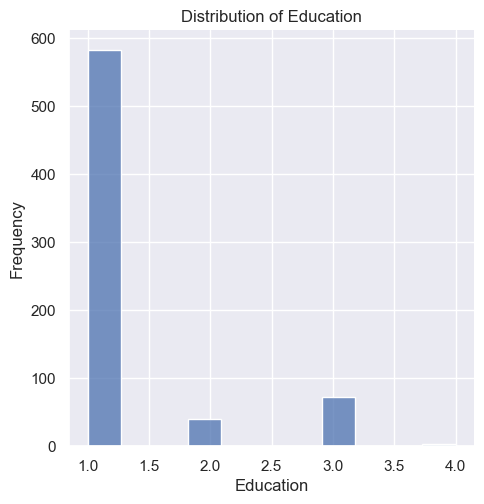

In [1880]:
sns.displot(data_mod['Education'])
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.savefig('pictures/education_distribution.png')
plt.show()

In [1881]:
data_mod['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [1882]:
data_mod['Education'] = data_mod['Education'].map({1:0, 2:1, 3:1, 4:1})
data_mod.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [1883]:
data_mod['Education'].unique()

array([0, 1], dtype=int64)

In [1884]:
data_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [1885]:
data_mod['Children'].unique()

array([2, 1, 0, 4, 3], dtype=int64)

In [1886]:
data_mod['Children'].value_counts()

Children
0    285
1    213
2    146
4     42
3     14
Name: count, dtype: int64

In [1887]:
data_mod['Pets'].unique()

array([1, 0, 4, 2, 5, 8], dtype=int64)

In [1888]:
data_mod['Pets'].value_counts()

Pets
0    439
1    132
2     92
4     29
5      5
8      3
Name: count, dtype: int64

### Checkpoint

In [1890]:
data_preprocessed = data_mod.copy()

## Features and Targets

### Absenteeism Time in Hours(targets)

In [1893]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

Using the median, we will balance the data, to prevent bias in prediction

In [1895]:
# balancing the data based on the targets
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [1896]:
# check the distribution of the targets value
targets.sum() / targets.shape[0]

0.45571428571428574

The targets column is now roughly divided evely with 46% of the entry are 1s while the remaining is 0s

In [1898]:
data_preprocessed['Excessive Absenteeism'] = targets
data_preprocessed.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [1899]:
data_preprocessed = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)
data_preprocessed.head()

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


## Select the inputs for the regression

In [1901]:
data_preprocessed.shape

(700, 15)

In [1902]:
unscaled_inputs = data_preprocessed.iloc[:,:-1]
unscaled_inputs

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0


### Standardize the inputs

In [1904]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [1905]:
unscaled_inputs.columns.values

array(['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4',
       'Month Value', 'Day of the Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets'], dtype=object)

In [1906]:
columns_to_omit = ['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4', 'Education']

In [1907]:
columns_to_scale = [col for col in unscaled_inputs.columns.values if col not in columns_to_omit]
columns_to_scale

['Month Value',
 'Day of the Week',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Children',
 'Pets']

In [1908]:
Absenteeism_scaler = CustomScaler(columns_to_scale)

In [1909]:
Absenteeism_scaler.fit(unscaled_inputs)

C:\Users\josep\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


CustomScaler(columns=['Month Value', 'Day of the Week',
                      'Transportation Expense', 'Distance to Work', 'Age',
                      'Daily Work Load Average', 'Body Mass Index', 'Children',
                      'Pets'])

In [1910]:
scaled_inputs = Absenteeism_scaler.transform(unscaled_inputs)

In [1911]:
scaled_inputs

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,-0.683704,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-0.683704,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.007725,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.668253,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,0.668253,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.007725,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,-0.007725,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,0.668253,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.668253,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690


### Split the data into train & test and shuffle

In [1913]:
from sklearn.model_selection import train_test_split

In [1914]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=20)

In [1915]:
print(x_train.shape, y_train.shape)

(560, 14) (560,)


In [1916]:
print(x_test.shape, y_test.shape)

(140, 14) (140,)


## Model

### Logistic regression with Sklearn

In [1919]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [1921]:
logreg = LogisticRegression()

In [1922]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [1923]:
logreg.score(x_train, y_train)

0.775

### Manually check the accuracy

In [1925]:
y_pred = logreg.predict(x_train)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [1926]:
y_pred == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [1927]:
np.sum(y_pred == y_train)

434

In [1928]:
y_pred.shape[0]

560

In [1929]:
accuracy = np.sum(y_pred == y_train) / y_pred.shape[0]
accuracy

0.775

### Finding the intercept and coefficients

In [1931]:
logreg.intercept_

array([-1.65662792])

In [1932]:
logreg.coef_

array([[ 2.80136327e+00,  9.33540824e-01,  3.09673857e+00,
         8.57183147e-01,  1.66403124e-01, -8.43159241e-02,
         6.13215559e-01, -7.77871894e-03, -1.65545282e-01,
        -7.68487792e-05,  2.71154773e-01, -2.06026920e-01,
         3.61897667e-01, -2.85728905e-01]])

In [1933]:
unscaled_inputs.columns.values

array(['Reason Type 1', 'Reason Type 2', 'Reason Type 3', 'Reason Type 4',
       'Month Value', 'Day of the Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets'], dtype=object)

In [1934]:
features = unscaled_inputs.columns.values

In [1935]:
summary_table = pd.DataFrame(columns=['Features'], data=features)
summary_table

,Features
0,Reason Type 1
1,Reason Type 2
2,Reason Type 3
3,Reason Type 4
4,Month Value
5,Day of the Week
6,Transportation Expense
7,Distance to Work
8,Age
9,Daily Work Load Average


In [1936]:
logreg.coef_.shape

(1, 14)

In [1937]:
summary_table['Coefficients'] = np.transpose(logreg.coef_)
summary_table

,Features,Coefficients
0,Reason Type 1,2.801363
1,Reason Type 2,0.933541
2,Reason Type 3,3.096739
3,Reason Type 4,0.857183
4,Month Value,0.166403
5,Day of the Week,-0.084316
6,Transportation Expense,0.613216
7,Distance to Work,-0.007779
8,Age,-0.165545
9,Daily Work Load Average,-0.000077


In [1938]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', logreg.intercept_[0]]
summary_table.sort_index
summary_table

,Features,Coefficients
1,Reason Type 1,2.801363
2,Reason Type 2,0.933541
3,Reason Type 3,3.096739
4,Reason Type 4,0.857183
5,Month Value,0.166403
6,Day of the Week,-0.084316
7,Transportation Expense,0.613216
8,Distance to Work,-0.007779
9,Age,-0.165545
10,Daily Work Load Average,-0.000077


### Interpreting the coefficients

In [1940]:
summary_table["Odds_ratio"] = np.exp(summary_table['Coefficients'])
summary_table

,Features,Coefficients,Odds_ratio
1,Reason Type 1,2.801363,16.467081
2,Reason Type 2,0.933541,2.543499
3,Reason Type 3,3.096739,22.125672
4,Reason Type 4,0.857183,2.356513
5,Month Value,0.166403,1.181049
6,Day of the Week,-0.084316,0.919141
7,Transportation Expense,0.613216,1.846359
8,Distance to Work,-0.007779,0.992251
9,Age,-0.165545,0.847431
10,Daily Work Load Average,-0.000077,0.999923


In [1941]:
summary_table.sort_values(['Odds_ratio'], ascending=False)

,Features,Coefficients,Odds_ratio
3,Reason Type 3,3.096739,22.125672
1,Reason Type 1,2.801363,16.467081
2,Reason Type 2,0.933541,2.543499
4,Reason Type 4,0.857183,2.356513
7,Transportation Expense,0.613216,1.846359
13,Children,0.361898,1.436052
11,Body Mass Index,0.271155,1.311478
5,Month Value,0.166403,1.181049
10,Daily Work Load Average,-0.000077,0.999923
8,Distance to Work,-0.007779,0.992251


## Feature Selection

A feature is not particularly important if
* its coefficient is around 0
* its odds ratio is around 1

A weight (coefficient) of 0 implies that no matter the feature value, we will multiply it by 0 (in the model)

For a unit change in the standardized feature, the odds increase by a multiple equal to the odds ratio (1 = no change).

The features below will therefore be removed from the model and the model retrained.
* Daily Work Load Average, odds ratio:	0.999923
* Distance to Work, odds ratio:	0.992251
* Day of the Week, odds ratio:	0.919141

In [1944]:
scaled_inputs

,Reason Type 1,Reason Type 2,Reason Type 3,Reason Type 4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,-0.683704,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-0.683704,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.007725,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.668253,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,0.668253,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.007725,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,-0.007725,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,0.668253,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.668253,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690


## Model with reduced features

In [1946]:
# Drop the unimportant features
selected_scaled_inputs = scaled_inputs.drop(['Day of the Week', 'Distance to Work', 'Daily Work Load Average'], axis=1)

# Split the data int test and train
x_train, x_test, y_train, y_test = train_test_split(selected_scaled_inputs, targets, train_size=0.8, random_state=20)

# Logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# model accuracy
model.score(x_train, y_train)

0.7732142857142857

In [1947]:
# create a data frame summary
features = selected_scaled_inputs.columns.values
summary_table = pd.DataFrame(columns=['Features'], data=features)
summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', model.intercept_[0]]
summary_table.sort_index
summary_table["Odds_ratio"] = np.exp(summary_table['Coefficients'])
summary_table.sort_values(['Odds_ratio'], ascending=False)

,Features,Coefficients,Odds_ratio
3,Reason Type 3,3.114061,22.512270
1,Reason Type 1,2.800006,16.444753
2,Reason Type 2,0.951748,2.590233
4,Reason Type 4,0.838359,2.312570
6,Transportation Expense,0.605137,1.831503
10,Children,0.348424,1.416833
8,Body Mass Index,0.279982,1.323106
5,Month Value,0.158977,1.172311
7,Age,-0.169906,0.843744
9,Education,-0.210174,0.810443
